# Task 3: Modeling optimization

In [58]:
import pandas as pd
import os
from pathlib import Path
import seaborn as sns  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import missingno as msno
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


## Import Data

In [59]:

df_train = pd.read_csv('../../data/processed/triathlon_watch_training_preprocessed_samu_prep_0.csv')
# OneHot-Encoding for categorical columns
df_train = pd.get_dummies(df_train, columns=df_train.select_dtypes(include=['object']).columns.to_list(), drop_first=True)

df_test = pd.read_csv('../../data/processed/triathlon_watch_test_preprocessed_samu.csv')
df_test = pd.get_dummies(df_test, columns=df_test.select_dtypes(include=['object']).columns.to_list(), drop_first=True)

In [62]:
df_train.shape, df_test.shape

((978, 42), (500, 42))

In [63]:
x_train = df_train.drop('user_of_latest_model', axis=1)

x_test = df_test.drop('user_of_latest_model', axis=1)

y_train = df_train['user_of_latest_model']
 
y_test = df_test['user_of_latest_model']

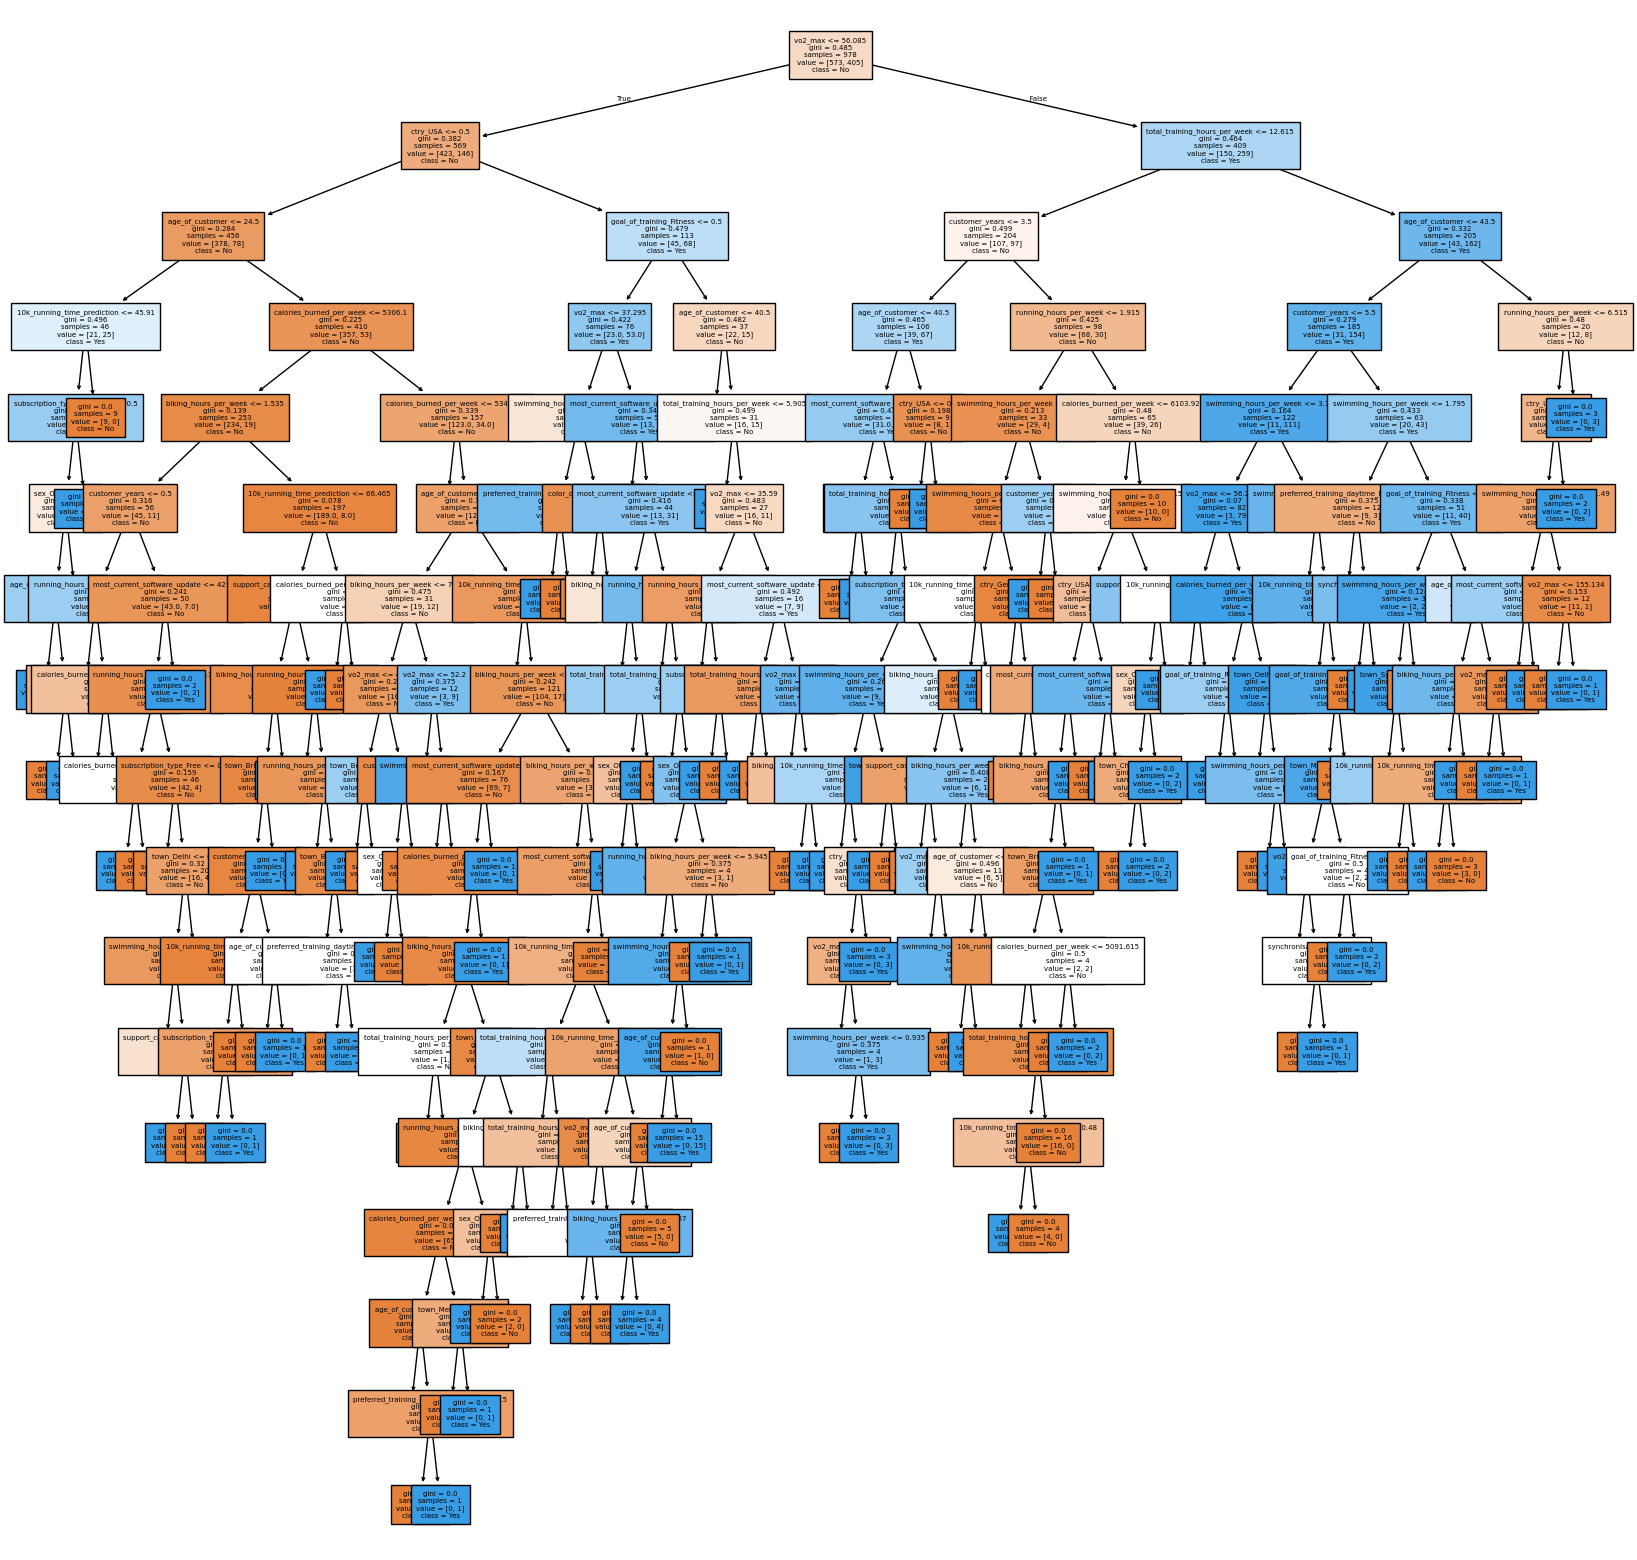

In [64]:
# simple classification tree
from sklearn import tree

#initialize model
dt = tree.DecisionTreeClassifier()
#fit model to training data
dt.fit(x_train,y_train)

plt.figure(figsize=(20, 20))  # Breite und Höhe anpassen
tree.plot_tree(dt, filled=True, feature_names=x_train.columns, class_names=['No', 'Yes'], fontsize=5)
plt.show()

Accuracy: 0.642
F1-Score: 0.5686746987951807


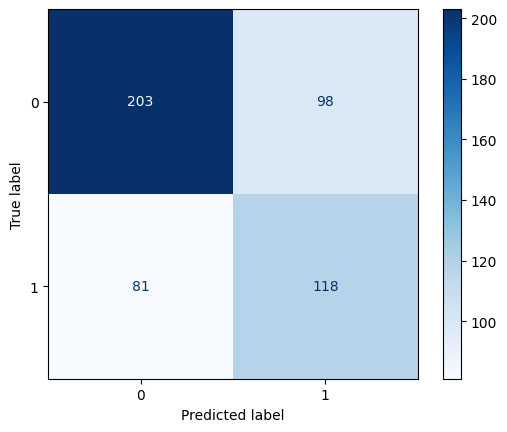

In [66]:
# Make predictions on the test data
y_pred = dt.predict(x_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("F1-Score:", f1)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()